# Part II - (Top Factors Having The Most Effect On Trip Duration and Determining Day-Time of Most Number of Trips)
## by (Adewunmi Olowu)

## Investigation Overview

> The aim of this investigation was to determine what factors contributed largely to the average time spent on a ride as well as understanding what day and time most rides were taken. Factors majorly focused on included start_periodofday, member_gender and start_dayofweek.


## Dataset Overview

> This document explores a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike=pd.read_csv('fordgobike-tripdata.csv')
print(fordgobike.shape)
print(fordgobike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [3]:
for col in ['start_time', 'end_time']:
    fordgobike[col] = fordgobike[col].astype('datetime64[ns]')

In [4]:
#Further breakdown Starttime & EndTime into day of week
fordgobike['start_dayofweek']=fordgobike['start_time'].dt.day_name()
fordgobike['end_dayofweek']=fordgobike['end_time'].dt.day_name()
fordgobike['start_hourofday']=fordgobike['start_time'].dt.hour
fordgobike['end_hourofday']=fordgobike['end_time'].dt.hour
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,end_dayofweek,start_hourofday,end_hourofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,Friday,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,Friday,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,Friday,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,Friday,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0


In [5]:
fordgobike['member_gender'] = fordgobike['member_gender'].fillna('N/A')

In [6]:
# convert member_gender into categorical type
gender_classes=['Female', 'Male','N/A','Other']
geclasses=pd.api.types.CategoricalDtype(categories=gender_classes)
fordgobike['member_gender']=fordgobike['member_gender'].astype(geclasses)

In [7]:
fordgobike['start_periodofday'] = (fordgobike['start_hourofday'] % 24 + 4) // 4
fordgobike['start_periodofday'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Afternoon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,end_dayofweek,start_hourofday,end_hourofday,start_periodofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,Friday,17,8,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,N/A,No,Thursday,Friday,18,6,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,Friday,12,5,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,Friday,17,4,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0,Night


In [8]:
#Conversion of 'start_periodofday' and 'start_dayofweek' to ordinal data type
period_classes=['Early Morning', 'Morning','Afternoon','Evening', 'Night', 'Late Night']
peclasses=pd.api.types.CategoricalDtype(ordered=True, categories=period_classes)
fordgobike['start_periodofday']=fordgobike['start_periodofday'].astype(peclasses)

In [9]:
day_classes=['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
daclasses=pd.api.types.CategoricalDtype(ordered=True, categories=day_classes)
fordgobike['start_dayofweek']=fordgobike['start_dayofweek'].astype(daclasses)

In [10]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,end_dayofweek,start_hourofday,end_hourofday,start_periodofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,Friday,17,8,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,N/A,No,Thursday,Friday,18,6,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,Friday,12,5,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,Friday,17,4,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0,Night


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Frequency of Trips

In order to understand the time period and day of the week that usually have the most number of rides.A countplot was used to deduce that Thursday evenings records the most number of rides. 

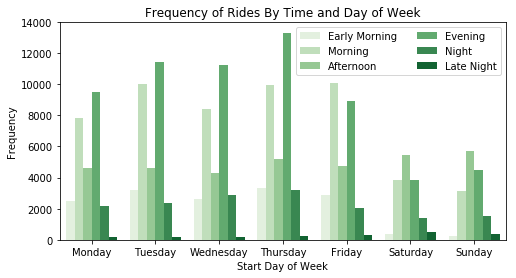

In [11]:
plt.figure(figsize = [8, 4])
ax=sb.countplot(data = fordgobike, x = 'start_dayofweek', hue = 'start_periodofday', palette = 'Greens')
ax.legend(loc=1, ncol = 2) # re-arrange legend to reduce overlapping

plt.ylabel('Frequency')
plt.xlabel('Start Day of Week')
plt.title('Frequency of Rides By Time and Day of Week');

## Distribution of Duration

> Let's take a look at the distribution of the variable- duration_sec using a log transformation considering the range of values. We see the distribution looks unimodal, with its peak between 500 and 1000. A few outliers are noticed from 30000 upwards. 

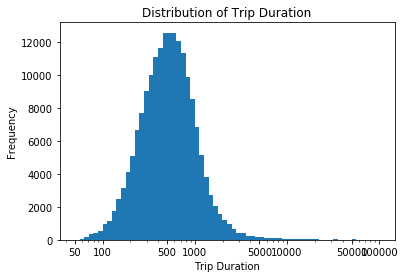

In [12]:
bins = 10 ** np.arange(1.7, 5+0.05, 0.05)
plt.hist(data = fordgobike, x = 'duration_sec', bins=bins)
plt.xscale('log')
ticks = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration');

## Relationship Between Duration and Day of Week, Time Period, Gender

A high interaction level between these categorical data shows that they have an impact on a ride's duration. We see more females than males use more time on rides typically during the weekends. Late Nights(followed by afternoon) had the most duration.

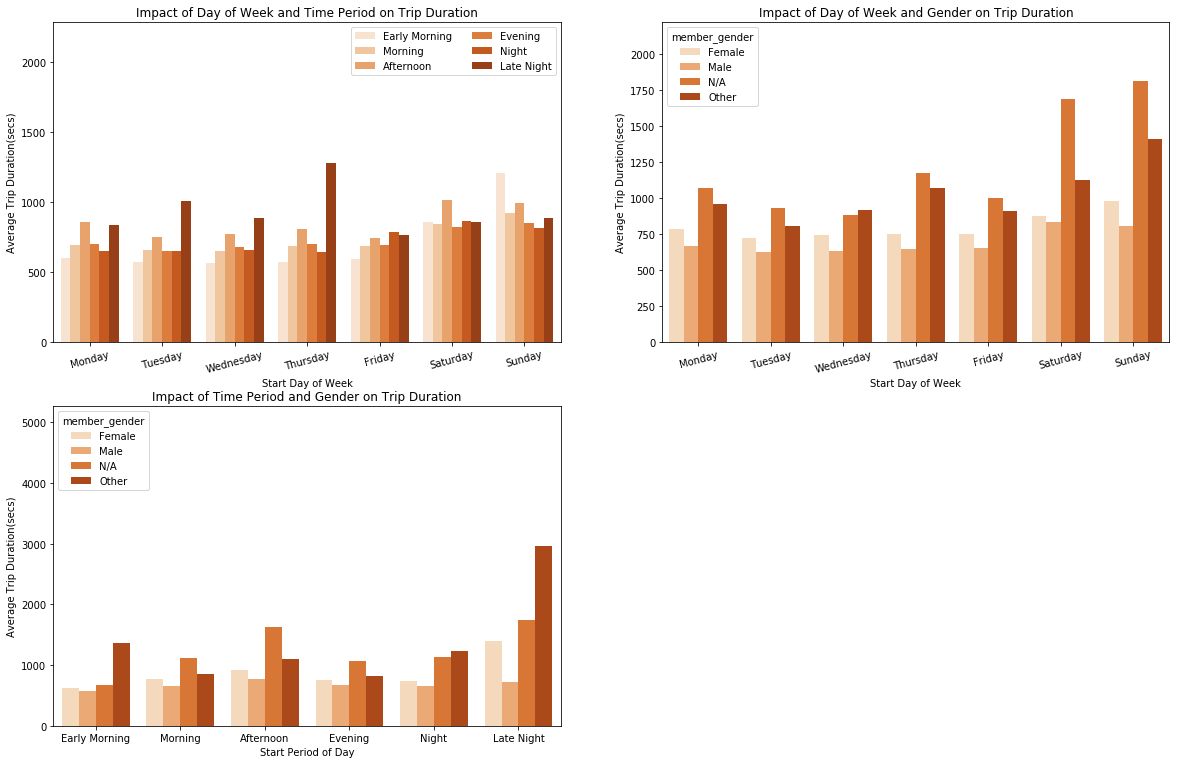

In [13]:
#Comparing 2 categorical data alongside numeric variable- duration_sec
plt.figure(figsize = [20, 20])
 

# subplot 1: 
ax=plt.subplot(3, 2, 1)
sb.barplot(data = fordgobike, x = 'start_dayofweek', y='duration_sec', hue = 'start_periodofday', palette = 'Oranges', errwidth=0)
ax.legend(loc=1, ncol = 2) 
plt.xticks(rotation=15)
plt.ylabel('Average Trip Duration(secs)')
plt.xlabel('Start Day of Week')
plt.title('Impact of Day of Week and Time Period on Trip Duration');

# subplot 2:
plt.subplot(3, 2, 2)
sb.barplot(data = fordgobike, x = 'start_dayofweek', y='duration_sec', hue = 'member_gender', palette = 'Oranges', errwidth=0)
plt.xticks(rotation=15)
plt.ylabel('Average Trip Duration(secs)')
plt.xlabel('Start Day of Week')
plt.title('Impact of Day of Week and Gender on Trip Duration')

# subplot 3: 
plt.subplot(3, 2, 3)
sb.barplot(data = fordgobike, x = 'start_periodofday', y='duration_sec', hue = 'member_gender', palette = 'Oranges', errwidth=0)
plt.ylabel('Average Trip Duration(secs)')
plt.xlabel('Start Period of Day')
plt.title('Impact of Time Period and Gender on Trip Duration')

plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Notebook.ipynb to slides
[NbConvertApp] Writing 379636 bytes to Part_II_Notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
